In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import random

In [4]:
class entity:
    
    def __init__(self, canvas, radius=3, color=(0,0,0)):
        self.p1 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.p2 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.radius  = radius
        self.color = color
    
    
class tableau:
    
    def __init__(self, shape, color=(255,255,255)):    
        self.canvas = np.ones((shape[0], shape[1], 3))*np.array(color)
        
    def display_with(self, entities):
        temp_canvas = np.copy(self.canvas)
        for entity in entities:
            temp_canvas = cv2.line(temp_canvas, entity.p1, entity.p2, entity.color, entity.radius) 
        end_result = temp_canvas.astype(int)
        plt.imshow(end_result)
        return end_result

In [5]:
tableau1 = tableau([224,224], color=(200,200,200))

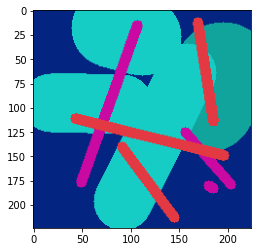

In [39]:
entities = []

#color0 = (230,230,230)

color0 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color1 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color2 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color3 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

tableau1 = tableau([224,224], color=color0)

entities = []

entities.append(entity(tableau1.canvas, radius=100, color=np.array(color1)*.8))
entities.append(entity(tableau1.canvas, radius=60, color=color1))
entities.append(entity(tableau1.canvas, radius=60, color=color1))
entities.append(entity(tableau1.canvas, radius=80, color=color1))

entities.append(entity(tableau1.canvas, radius=10, color=color2))
entities.append(entity(tableau1.canvas, radius=10, color=color2))
entities.append(entity(tableau1.canvas, radius=10, color=color2))

entities.append(entity(tableau1.canvas, radius=10, color=color3))
entities.append(entity(tableau1.canvas, radius=10, color=color3))
entities.append(entity(tableau1.canvas, radius=10, color=color3))

tableau1.display_with(entities)
pass